<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/decision_tree/%D0%94%D0%97_8_decisionnTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [232]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [233]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

<Axes: >

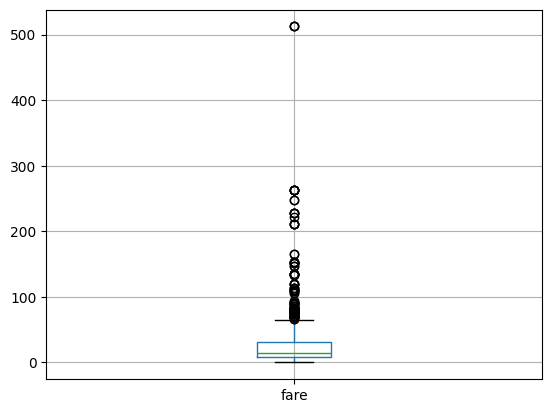

In [234]:
df.boxplot('fare')

In [235]:
mask = df['fare'] < 200
df = df[mask]

In [236]:
y = df['fare']
X = df.drop(columns= 'fare')
X.head(5)

,pclass,age,embarked
0,3,22.0,S
1,1,38.0,C
2,3,26.0,S
3,1,35.0,S
4,3,35.0,S


In [237]:
df.describe()

,pclass,age,fare
count,871.000000,696.000000,871.000000
mean,2.338691,29.661164,26.530170
std,0.821469,14.571894,29.351184
min,1.000000,0.420000,0.000000
25%,2.000000,20.000000,7.895800
50%,3.000000,28.000000,13.862500
75%,3.000000,38.000000,30.000000
max,3.000000,80.000000,164.866700


In [238]:
df.dtypes

,0
pclass,int64
age,float64
embarked,object
fare,float64


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                    random_state=42
                                                    )
X_train.shape, X_test.shape

((696, 3), (175, 3))

# Завдання 2
Створіть Pipeline для обробки даних

In [240]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from  sklearn.impute import  KNNImputer


In [241]:
num_column = X_train.select_dtypes(include='number').columns
cat_column = X_train.select_dtypes(include='object').columns

num_column

Index(['pclass', 'age'], dtype='object')

In [242]:
num_transformer = Pipeline([
      ('impute', SimpleImputer(strategy='median'))
])

In [243]:
cat_transformer = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [244]:
preprocessor = ColumnTransformer([
    ('num',num_transformer,num_column),
    ('cat', cat_transformer,cat_column)
])

preprocessor.set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 Index(['embarked'], dtype='object'))])

# Завдання 3
Об'єднайте дерево рішень з препроцесором та натренуйте їх

In [245]:
from sklearn.tree import DecisionTreeRegressor
full_model = Pipeline([
    ('set', preprocessor),
    ('tree', DecisionTreeRegressor(max_depth=5))
    ])


In [246]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('set',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=5))])

# Завдання 4
Виведіть основні метрики моделі

In [247]:
from sklearn import metrics

pred = full_model.predict(X_test)
metrics.r2_score(y_test,pred)

0.5095027705378194

В разі якщо не чистити викиди в колонці Fare данні стають мінусові -0.6449897779769103, з чисткою данні 0.3217044251751424 дані краще але не ідеальні , чиста викидів до 200 покращила показник0.49232017527475413 такоз зміна глибини впливає на результат , накраще працює глибина 4,5 .
  

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer(SimpleImputer vs KNNImputer) та кодування категоріальних даних(OneHotEncoder vs OrdinaryEncoder))
* змінити параметри дерева(глибина, кількість точок у листках тощо)

 KNNImputer заміна не показала високих результатів 0.4895345398431121

# Завдання 6
Збережіть модель

In [248]:
import joblib
joblib.dump(full_model, 'model.pkl')


['model.pkl']

In [249]:
joblib.load('model.pkl')

Pipeline(steps=[('set',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=5))])